RMSE: 11.69442499247158


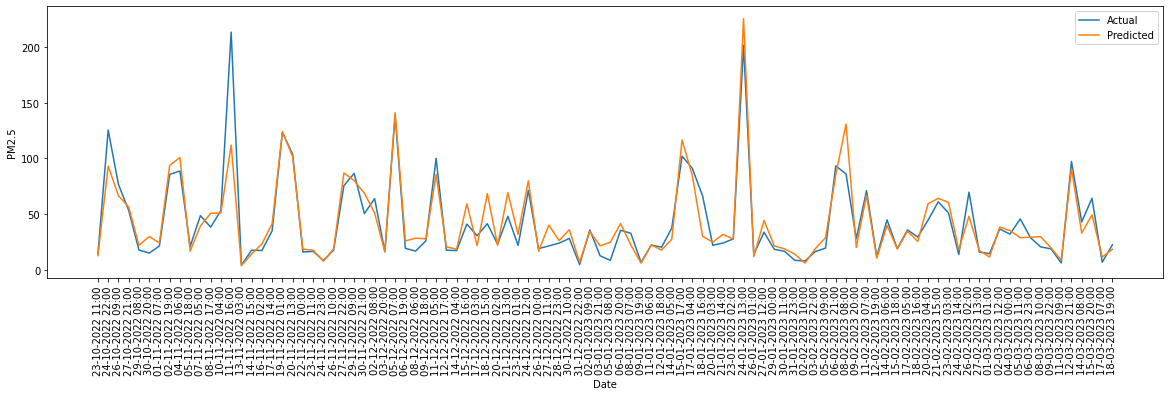

In [1]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv('Data/kurla_cleaned.csv')

# Extract Date column
dates = df['Date']

# Remove the 'Date' columns
df = df.drop(['Date'], axis=1)

# Separate target variable
y = df['PM2.5']
X = df.drop(['PM2.5'], axis=1)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.05, max_depth=5, random_state=42)

# Fit the model on training data
xgb_model.fit(X_train, y_train)

# Make predictions on test data
y_pred = xgb_model.predict(X_test)

# Calculate root mean squared error
rmse = mean_squared_error(y_test, y_pred, squared=False)
print('RMSE:', rmse)

# Set range of dates to 100 values
date_indices = np.linspace(-len(y_test), -1, 100, dtype=int)

# Plot actual vs predicted values
plt.subplots(figsize=(20, 5))
plt.plot(dates.iloc[date_indices], y_test.iloc[date_indices], label='Actual')
plt.plot(dates.iloc[date_indices], y_pred[date_indices], label='Predicted')
plt.xlabel('Date')
plt.ylabel('PM2.5')
plt.xticks(rotation=90)
plt.legend()
plt.show()


Epoch: 9, Train RMSE: 30.38, Test RMSE: 32.18
Test RMSE: 32.18


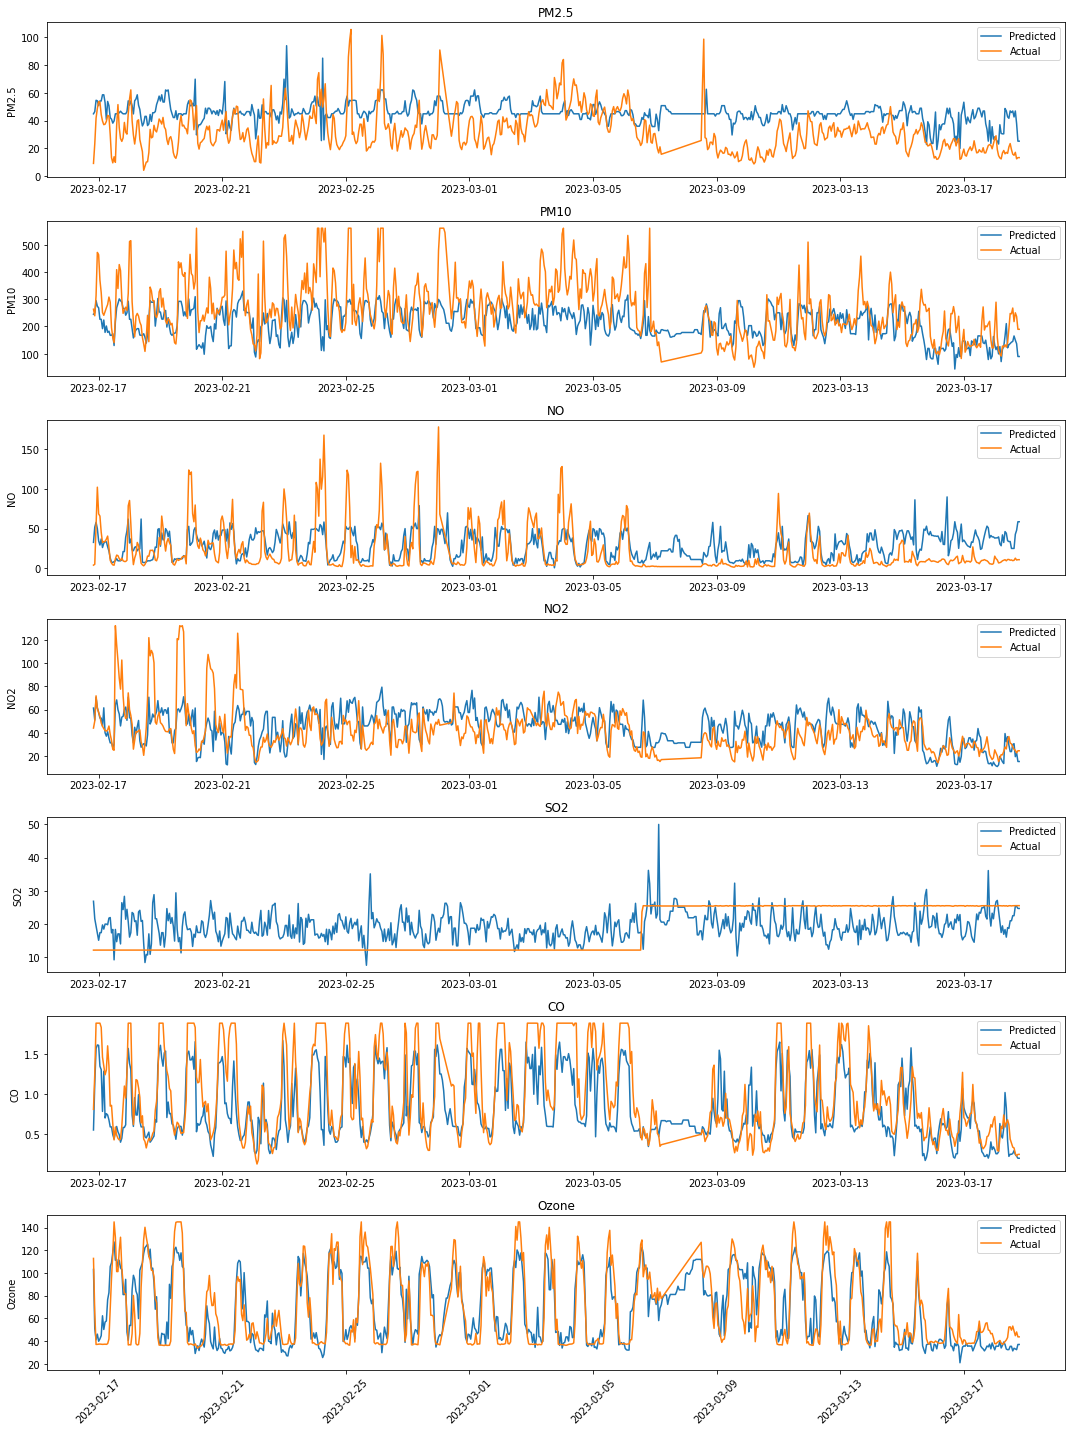

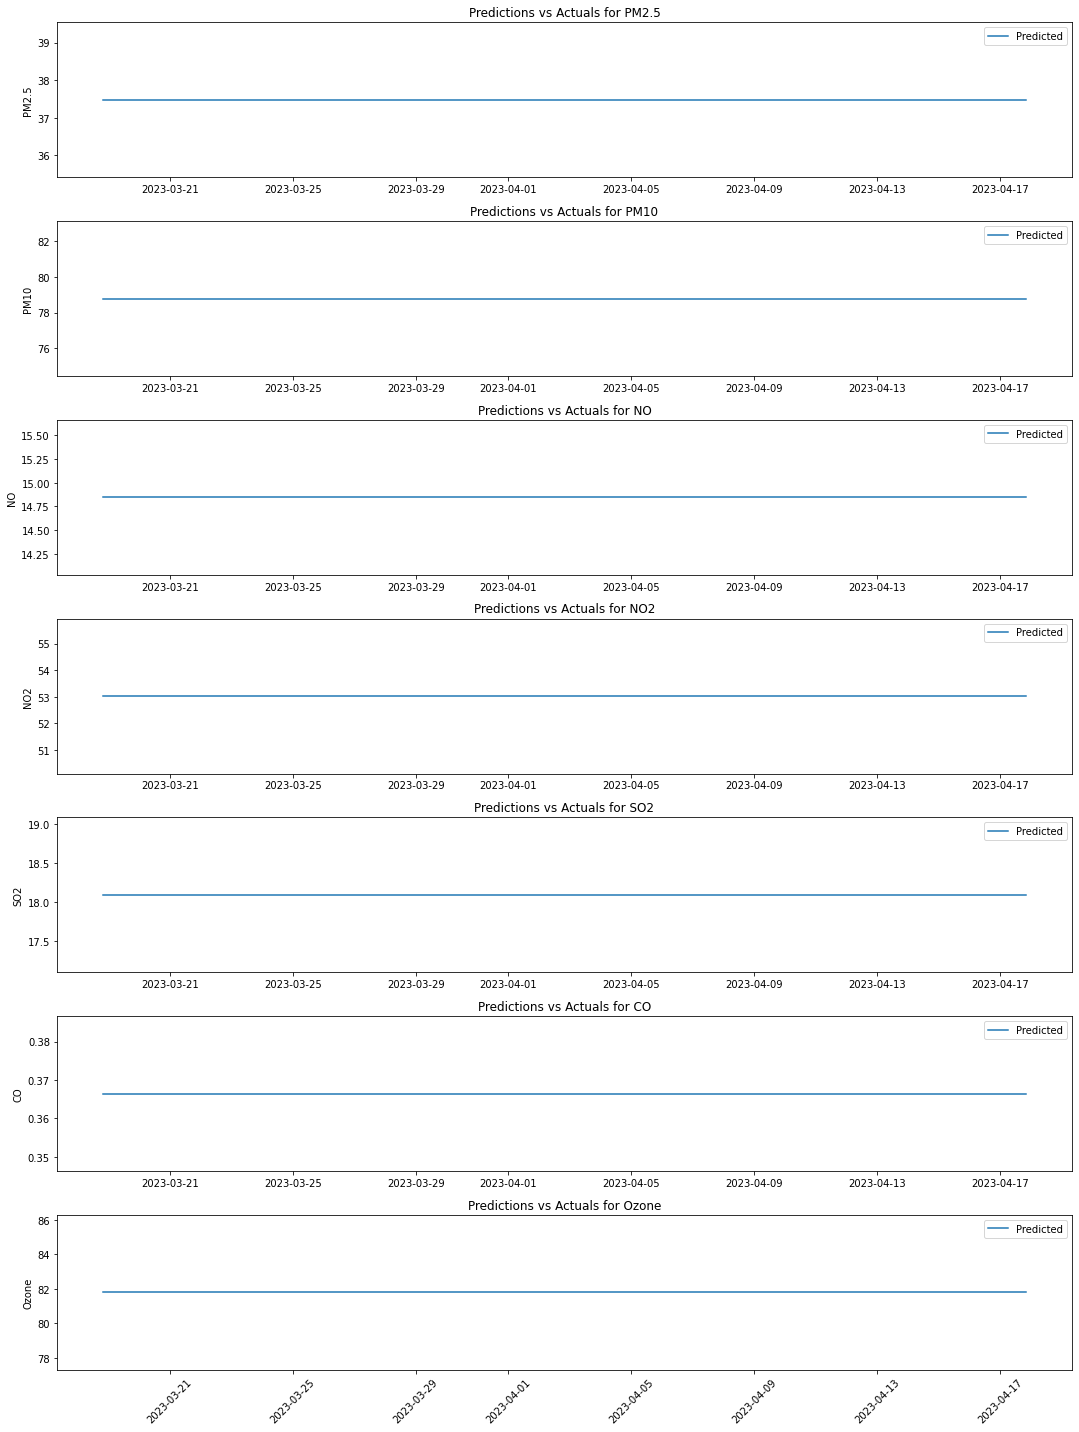

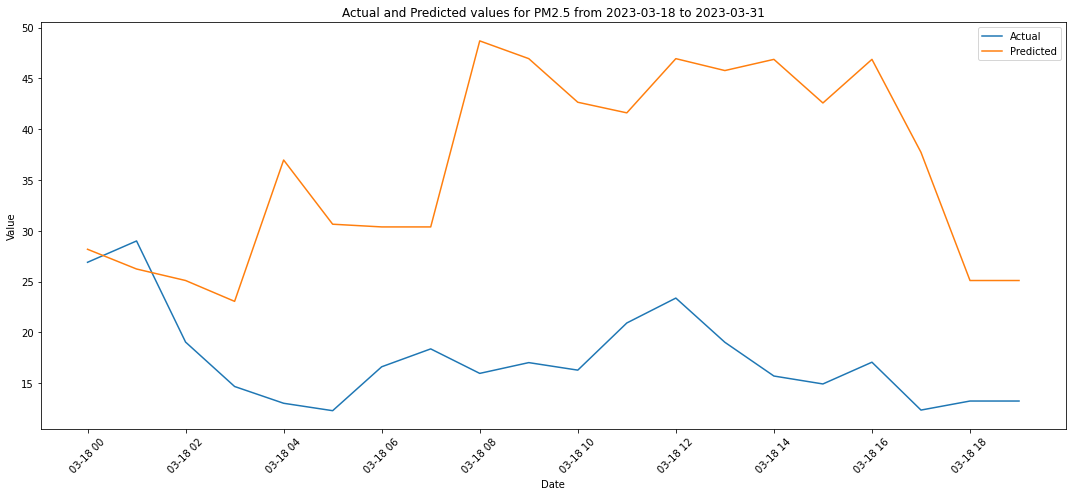

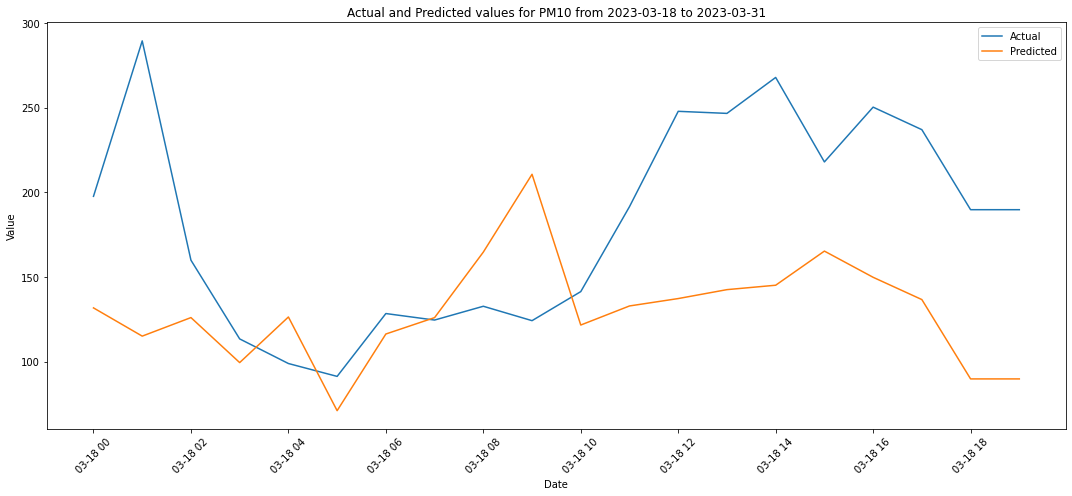

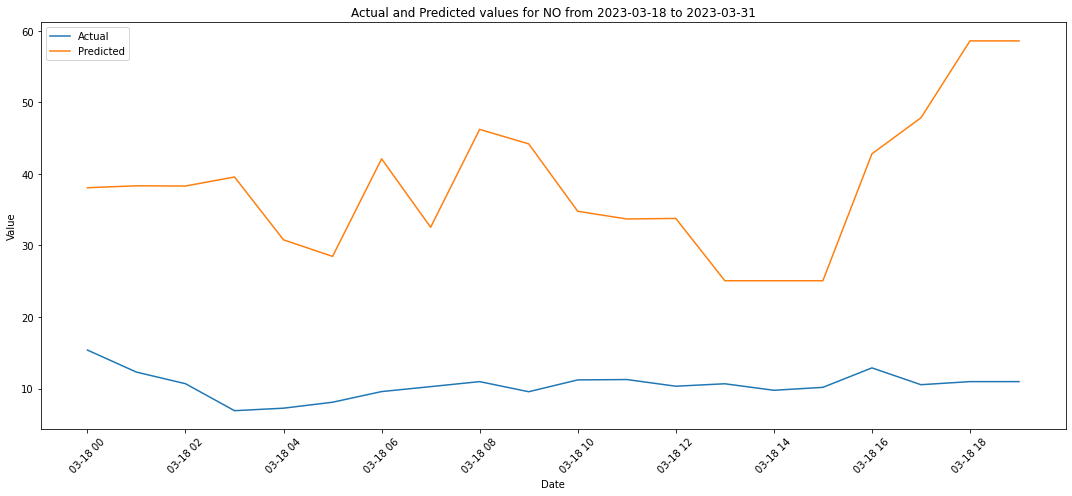

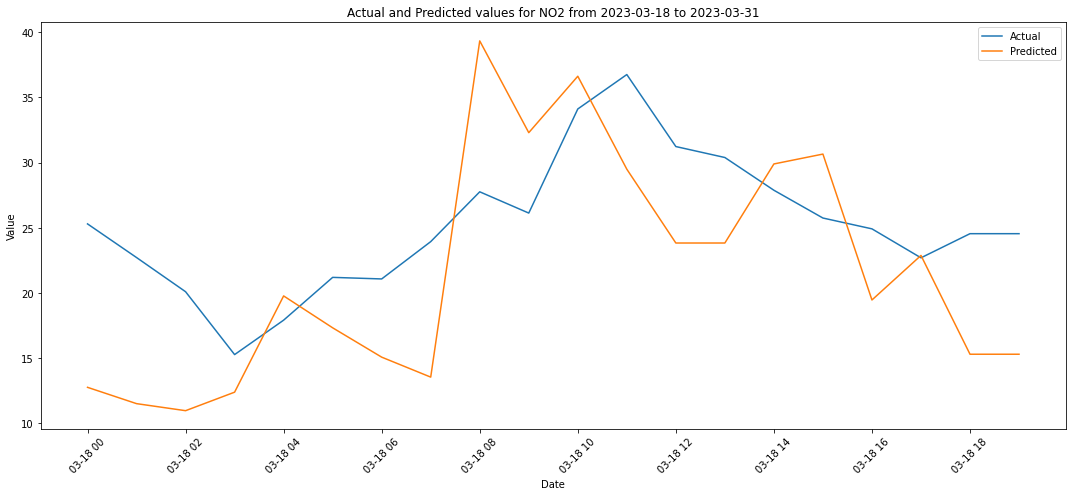

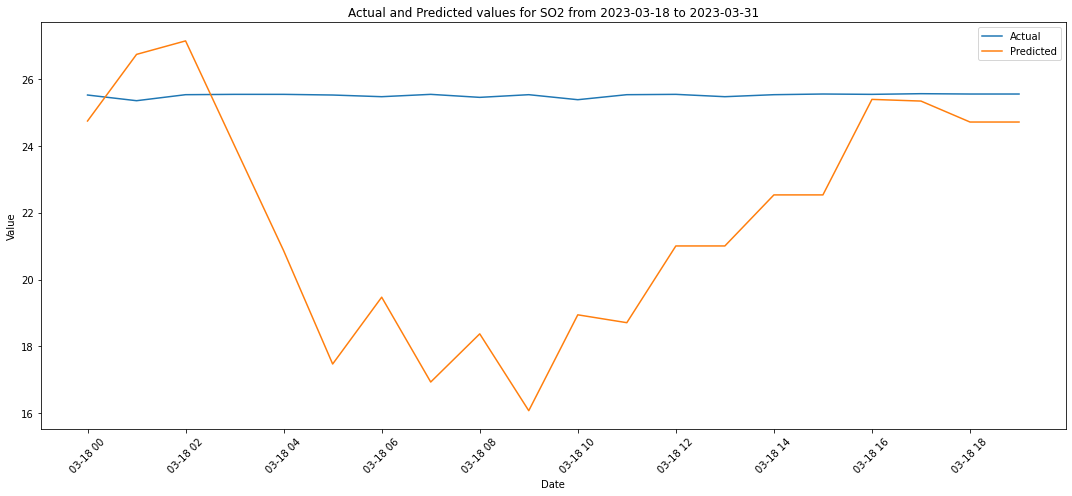

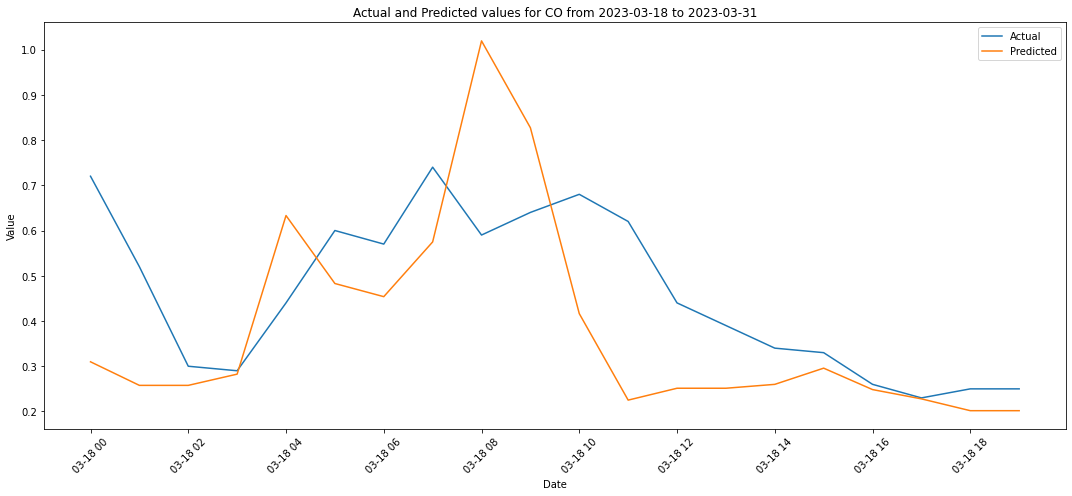

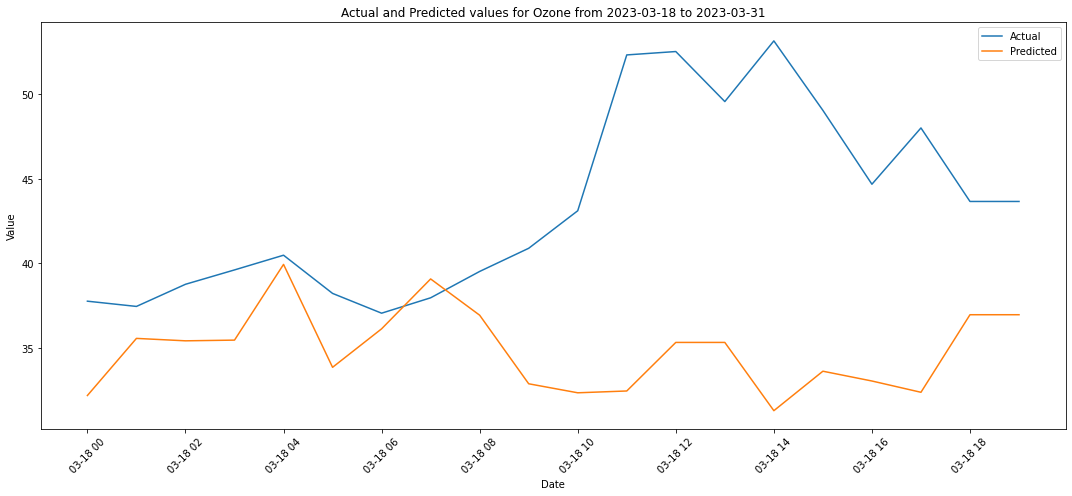

In [5]:
# Import necessary libraries
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Load the data into a Pandas dataframe
df = pd.read_csv('Data/kurla_cleaned.csv')
df = df.drop(columns=["Unnamed: 0"])

# Convert the date column into datetime format and set it as the index of the dataframe
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y %H:%M')
df.set_index('Date', inplace=True)

# Split the data into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.2)

# Separate the target variables from the predictors
targets = ['PM2.5', 'PM10', 'NO', 'NO2', 'SO2', 'CO', 'Ozone']
X_train = train_data.drop(columns=targets)
y_train = train_data[targets]
X_test = test_data.drop(columns=targets)
y_test = test_data[targets]



# Create an XGBoost model and train it on the training data
model = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 10, seed=123)
epochs = 10
train_errors, test_errors = [], []
for epoch in range(epochs):
    model.fit(X_train, y_train, verbose=False)
    train_preds = model.predict(X_train)
    train_rmse = mean_squared_error(y_train, train_preds, squared=False)
    test_preds = model.predict(X_test)
    test_rmse = mean_squared_error(y_test, test_preds, squared=False)
    train_errors.append(train_rmse)
    test_errors.append(test_rmse)
print(f'Epoch: {epoch}, Train RMSE: {train_rmse:.2f}, Test RMSE: {test_rmse:.2f}')

# # Evaluate the accuracy of the model on the testing data
# test_preds = model.predict(X_test)
# test_rmse = mean_squared_error(y_test, test_preds, squared=False)
# print(f'Test RMSE: {test_rmse:.2f}')


#FOR PREVIOUS MONTH

# Use the trained model to predict the values of PM2.5, PM10, NO, NO2, SO2, CO, and Ozone for the last month of data
last_month_data = df.tail(720)
last_month_preds = model.predict(last_month_data.drop(columns=targets))
last_month_preds_df = pd.DataFrame(last_month_preds, index=last_month_data.index, columns=targets)

# Visualize the predictions on a graph with proper dates on the x-axis
# fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(15, 20))
# for i, target in enumerate(targets):
#     axes[i].plot(last_month_preds_df.index, last_month_preds_df[target])
#     axes[i].set_title(target)
#     axes[i].set_ylabel(target)
# plt.xticks(rotation=45)
# plt.tight_layout()

fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(15, 20))
for i, target in enumerate(targets):
    axes[i].plot(last_month_preds_df.index, last_month_preds_df[target], label='Predicted')
    axes[i].plot(last_month_data.index, last_month_data[target], label='Actual')
    axes[i].set_title(target)
    axes[i].set_ylabel(target)
    axes[i].legend()
plt.xticks(rotation=45)
plt.tight_layout()


# Create a date range for the next month
start_date = df.index[-1] + pd.Timedelta(hours=1)
end_date = start_date + pd.Timedelta(days=30)
date_range = pd.date_range(start=start_date, end=end_date, freq='H')

#FOR FUTURE MONTH

# Create a dataframe with the date range and fill in the other columns with NaN
future_data = pd.DataFrame(index=date_range, columns=df.columns)
future_data[["RH", "WS", "WD", "AT"]] = 50  # set constant values for these columns

# Use the trained model to predict the values of PM2.5, PM10, NO, NO2, SO2, CO, and Ozone for the next month of data
future_preds = model.predict(future_data.drop(columns=targets))
future_preds_df = pd.DataFrame(future_preds, index=date_range, columns=targets)

# Visualize the predictions on a single graph with proper dates on the x-axis
fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(15, 20))
for i, target in enumerate(targets):
    axes[i].plot(future_preds_df.index, future_preds_df[target], label='Predicted')
    # axes[i].plot(future_preds_df.index, last_month_data[target], label='Actual')
    axes[i].set_title(f"Predictions vs Actuals for {target}")
    axes[i].set_ylabel(target)
    axes[i].legend()
plt.xticks(rotation=45)
plt.tight_layout()

#FOR SPECIFIC PERIOD
start_date = "2023-03-18"
end_date = "2023-03-31"
period = df.loc[start_date:end_date]

# Use the trained model to predict the values of PM2.5, PM10, NO, NO2, SO2, CO, and Ozone for the period of interest
period_preds = model.predict(period.drop(columns=targets))
period_preds_df = pd.DataFrame(period_preds, index=period.index, columns=targets)

for target in targets:
    fig, ax = plt.subplots(figsize=(15, 7))
    ax.plot(period.index, period[target], label="Actual")
    ax.plot(period_preds_df.index, period_preds_df[target], label="Predicted")
    ax.set_title(f"Actual and Predicted values for {target} from {start_date} to {end_date}")
    ax.set_xlabel("Date")
    ax.set_ylabel("Value")
    ax.legend()
    plt.xticks(rotation=45)
    plt.tight_layout()